# Clusterización / DBSCAN (Core)
Descripción
DBSCAN (Core)

Descripción:

En esta actividad, implementarás el algoritmo DBSCAN para detectar patrones de agrupamiento y encontrar clientes atípicos en el dataset «Wholesale Customers Data» disponible en Kaggle. DBSCAN es ideal para detectar clusters de forma arbitraria y encontrar puntos atípicos (outliers), lo que es útil en escenarios donde los datos no forman clusters esféricos como en el caso de K-means.

Enlace al dataset: https://www.kaggle.com/binovi/wholesale-customers-data



Objetivo:

El objetivo principal de esta actividad es aplicar el algoritmo DBSCAN para identificar clusters y clientes atípicos en el dataset. El enfoque está en comprender cómo DBSCAN maneja los outliers y su capacidad para detectar agrupamientos densos.



Instrucciones:

1. Carga de datos:
- Descarga y carga el dataset de Kaggle. Realiza una exploración inicial del dataset, identificando las variables que consideras importantes para el agrupamiento.
- El dataset contiene información sobre diferentes tipos de clientes y su comportamiento de compra, lo que incluye variables como el gasto anual en distintas categorías de productos.

2. Exploración y preprocesamiento de datos: 
- Realiza un análisis exploratorio de los datos, incluyendo un resumen estadístico de las variables. Es importante entender la distribución de los datos antes de aplicar el modelo de DBSCAN.
- Asegúrate de estandarizar los datos antes de ejecutar DBSCAN, ya que este algoritmo es sensible a la escala de las variables.
- Considera la posibilidad de eliminar o tratar valores atípicos que puedan afectar el rendimiento del algoritmo.

3. Aplicación de DBSCAN:
- Implementa el algoritmo DBSCAN en el dataset. Recuerda que DBSCAN tiene dos hiperparámetros importantes: epsilon (distancia máxima para considerar dos puntos como vecinos) y min_samples (número mínimo de puntos requeridos para formar un cluster).
- Experimenta con diferentes valores de epsilon y min_samples para obtener agrupamientos significativos. Utiliza técnicas visuales como gráficos de dispersión para evaluar los resultados obtenidos.
- Determina cuáles son los outliers identificados por DBSCAN y visualiza cómo se distribuyen en relación con los clusters formados.

4. Visualización de clusters y outliers:
- Visualiza los clusters formados por DBSCAN en gráficos de dispersión. Utiliza diferentes colores para representar los clusters y marca los outliers con un color distintivo para hacer visible su presencia.
- Discute la estructura de los clusters encontrados. ¿Hay alguna correlación entre las variables y los clusters? ¿Cómo se distribuyen los outliers en comparación con los datos agrupados?

5. Interpretación de resultados:
- Evalúa la calidad del agrupamiento. DBSCAN no requiere que se especifique el número de clusters, lo que es una ventaja cuando no se conoce esta información de antemano.
- Discute la naturaleza de los outliers detectados. ¿Son clientes únicos con comportamientos inusuales? ¿Podrían estos clientes representar oportunidades comerciales o riesgos?



Análisis de Resultados:

- En esta sección, realiza un análisis detallado de los clusters formados y de los outliers. Utiliza métricas como el «silhouette score» para evaluar la calidad del agrupamiento, aunque es importante recordar que DBSCAN no siempre forma clusters compactos, por lo que estas métricas deben interpretarse con cuidado.

- Genera un reporte que explique los valores de epsilon y min_samples elegidos, y justifica por qué esos valores fueron adecuados para este dataset. Analiza si los clusters formados tienen sentido desde una perspectiva comercial o de comportamiento del cliente.



Conclusión:

- Esta actividad tiene como objetivo principal el uso de DBSCAN para encontrar agrupamientos en datos que pueden no formar clusters bien definidos. También busca desarrollar habilidades para la detección de outliers y para el ajuste de los parámetros de un modelo no supervisado.

In [1]:
import pandas as pd

df = pd.read_csv('/Users/mathiorti/Desktop/Me/Cursos/Data Analisis and Machine Learning/Data Sets/Wholesale customers data.csv')
print(df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [2]:
print(df.describe())

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None


In [4]:
print(df.isnull().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [6]:
print(df.duplicated().sum())

0


Mejores parámetros encontrados: eps=0.4500000000000001, min_samples=6 con un Silhouette Score de 0.008692459993703616


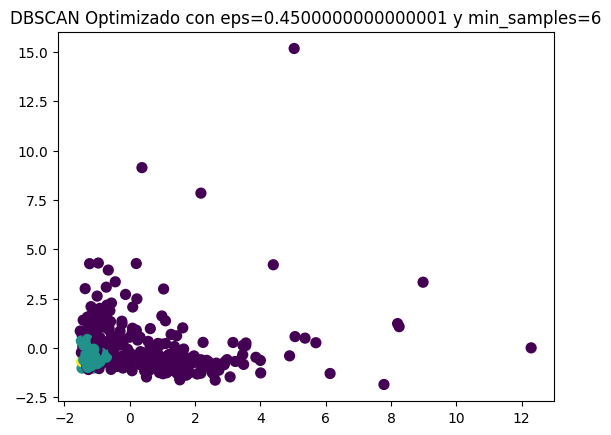

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
X = df_scaled

#Esta teoría de optimización la quito del Bootcamp
# Definir una función para aplicar DBSCAN con diferentes parámetros y evaluar con Silhouette Score
def dbscan_silhouette(eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    if len(set(labels)) > 1:  # Si no todos los puntos son ruido
        score = silhouette_score(X, labels)
        return score
    else:
        return -1  # Score negativo si todos los puntos son considerados ruido

# Realizar Grid Search para encontrar los mejores parámetros
eps_values = np.arange(0.1, 0.5, 0.05)
min_samples_values = range(3, 10)
best_score = -1
best_params = None

for eps in eps_values:
    for min_samples in min_samples_values:
        score = dbscan_silhouette(eps, min_samples)
        if score > best_score:
            best_score = score
            best_params = (eps, min_samples)

best_eps, best_min_samples = best_params
print(f"Mejores parámetros encontrados: eps={best_eps}, min_samples={best_min_samples} con un Silhouette Score de {best_score}")

# Aplicar DBSCAN con los mejores parámetros encontrados
dbscan_optimized = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels_dbscan_optimized = dbscan_optimized.fit_predict(X)

#Reduzco los datos a 2 dimensiones con PCA para la visualizacion
pca = PCA(n_components=2)
X = pca.fit_transform(X)

# Visualizar los resultados optimizados de DBSCAN
plt.scatter(X[:, 0], X[:, 1], c=labels_dbscan_optimized, cmap='viridis', s=50)
plt.title(f"DBSCAN Optimizado con eps={best_eps} y min_samples={best_min_samples}")
plt.show()

Mejores parámetros encontrados: eps=1.7000000000000002, min_samples=3 con un Silhouette Score de 0.3655323863951086


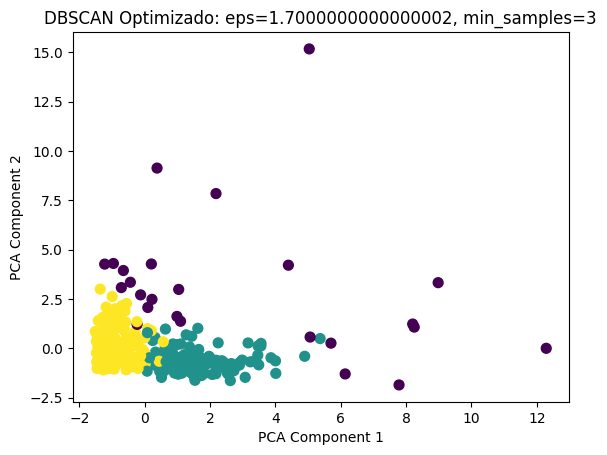

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)  # Reemplazar df con tu DataFrame real

# Función para calcular Silhouette Score
def dbscan_silhouette(eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_scaled)
    if len(set(labels)) > 1:  # Al menos un cluster y ruido
        return silhouette_score(X_scaled, labels)
    else:
        return -1  # No hay clusters válidos

# Grid Search para encontrar mejores parámetros
eps_values = np.arange(0.1, 2.0, 0.1)  # Ajusta el rango según el dataset
min_samples_values = range(3, 15)
best_score = -1
best_params = None

for eps in eps_values:
    for min_samples in min_samples_values:
        score = dbscan_silhouette(eps, min_samples)
        if score > best_score:
            best_score = score
            best_params = (eps, min_samples)

best_eps, best_min_samples = best_params
print(f"Mejores parámetros encontrados: eps={best_eps}, min_samples={best_min_samples} con un Silhouette Score de {best_score}")

# Aplicar DBSCAN con los mejores parámetros
dbscan_optimized = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels_optimized = dbscan_optimized.fit_predict(X_scaled)

# Reducir a 2D para visualización usando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar los clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_optimized, cmap='viridis', s=50)
plt.title(f"DBSCAN Optimizado: eps={best_eps}, min_samples={best_min_samples}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


# Conclusión
Cada color representa un cluster diferente identificado por DBSCAN.

Los puntos en morado oscuro corresponden a outliers

Los demás son clusters válidos

Hay un cluster en la región inferior izquierda que es el amarillo, tiene alta densidad.

Tenemos un poco de ambiguedad porque se junta el verde con el amarillo